<a href="https://colab.research.google.com/github/DawidK4/MyNotebooks/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/Datasets/'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Zad 1

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Zad 2

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = [['b', 'c', 'f', 'g'],
           ['c', 'g'],
           ['b', 'h', 'i',],
           ['b', 'e'],
           ['a', 'd', 'g', 'h'],
           ['d', 'e'],
           ['b', 'c', 'e', 'f'],
           ['b', 'c', 'd', 'h', 'i'],
           ['b', 'c', 'e', 'g'],
           ['a', 'd', 'e', 'g'],
           ['d', 'h'],
           ['a', 'd', 'e', 'h'],
           ['b','e'],
           ['a', 'e', 'g'],]
# przekształacenie danych tekstowych na binarne
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print(te_ary)

[[False  True  True False False  True  True False False]
 [False False  True False False False  True False False]
 [False  True False False False False False  True  True]
 [False  True False False  True False False False False]
 [ True False False  True False False  True  True False]
 [False False False  True  True False False False False]
 [False  True  True False  True  True False False False]
 [False  True  True  True False False False  True  True]
 [False  True  True False  True False  True False False]
 [ True False False  True  True False  True False False]
 [False False False  True False False False  True False]
 [ True False False  True  True False False  True False]
 [False  True False False  True False False False False]
 [ True False False False  True False  True False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent itemsets

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(d),(a),0.428571,0.285714,0.214286,0.500000,1.7500,1.0,0.091837,1.428571,0.750000,0.428571,0.300000,0.625000
1,(a),(d),0.285714,0.428571,0.214286,0.750000,1.7500,1.0,0.091837,2.285714,0.600000,0.428571,0.562500,0.625000
2,(e),(a),0.571429,0.285714,0.214286,0.375000,1.3125,1.0,0.051020,1.142857,0.555556,0.333333,0.125000,0.562500
3,(a),(e),0.285714,0.571429,0.214286,0.750000,1.3125,1.0,0.051020,1.714286,0.333333,0.333333,0.416667,0.562500
4,(g),(a),0.428571,0.285714,0.214286,0.500000,1.7500,1.0,0.091837,1.428571,0.750000,0.428571,0.300000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"(h, i)",(b),0.142857,0.500000,0.142857,1.000000,2.0000,1.0,0.071429,inf,0.583333,0.285714,1.000000,0.642857
66,"(b, i)",(h),0.142857,0.357143,0.142857,1.000000,2.8000,1.0,0.091837,inf,0.750000,0.400000,1.000000,0.700000
67,(h),"(b, i)",0.357143,0.142857,0.142857,0.400000,2.8000,1.0,0.091837,1.428571,1.000000,0.400000,0.300000,0.700000
68,(b),"(h, i)",0.500000,0.142857,0.142857,0.285714,2.0000,1.0,0.071429,1.200000,1.000000,0.285714,0.166667,0.642857


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,a,b,c,d,e,f,g,h,i
0,False,True,True,False,False,True,True,False,False
1,False,False,True,False,False,False,True,False,False
2,False,True,False,False,False,False,False,True,True
3,False,True,False,False,True,False,False,False,False
4,True,False,False,True,False,False,True,True,False
5,False,False,False,True,True,False,False,False,False
6,False,True,True,False,True,True,False,False,False
7,False,True,True,True,False,False,False,True,True
8,False,True,True,False,True,False,True,False,False
9,True,False,False,True,True,False,True,False,False


(14, 9)

In [ ]:
min_support = 0.2

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print(frequent_itemsets)

     support itemsets
0   0.285714      (a)
1   0.500000      (b)
2   0.357143      (c)
3   0.428571      (d)
4   0.571429      (e)
5   0.428571      (g)
6   0.357143      (h)
7   0.214286   (d, a)
8   0.214286   (e, a)
9   0.214286   (g, a)
10  0.285714   (b, c)
11  0.285714   (b, e)
12  0.214286   (g, c)
13  0.214286   (d, e)
14  0.285714   (h, d)
15  0.214286   (g, e)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_2 = apriori(df, min_support=min_support, use_colnames=True, max_len=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


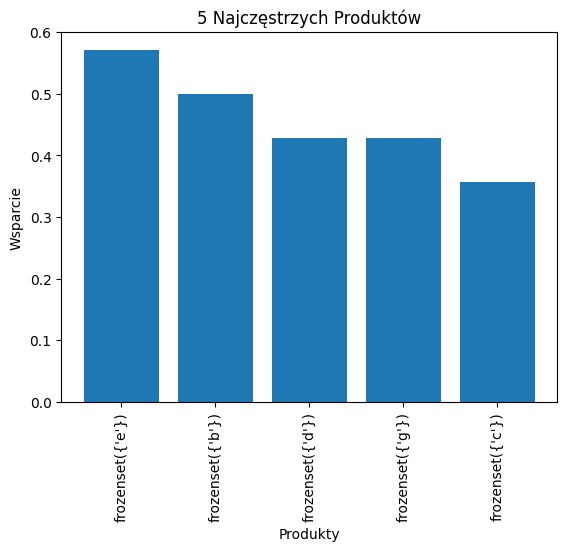

In [ ]:
import matplotlib.pyplot as plt

top_5_frequent_itemsets = frequent_itemsets.head(5)

plt.bar(top_5_frequent_itemsets['itemsets'].astype(str), top_5_frequent_itemsets['support'])
plt.xlabel("Produkty")
plt.ylabel("Wsparcie")
plt.title("5 Najczęstrzych Produktów")
plt.xticks(rotation=90)
plt.show()

# Zad 3

In [ ]:
frequent_itemsets_2_3 = apriori(df, min_support=min_support, use_colnames=True, max_len=3)

frequent_itemsets_2_3 = frequent_itemsets_2_3[
    (frequent_itemsets_2_3['itemsets'].apply(len) == 2) |
    (frequent_itemsets_2_3['itemsets'].apply(len) == 3)
]

frequent_itemsets_2_3 = frequent_itemsets_2_3.sort_values(by=['support'], ascending=False)

print(frequent_itemsets_2_3)

     support itemsets
10  0.285714   (b, c)
11  0.285714   (b, e)
14  0.285714   (h, d)
7   0.214286   (d, a)
8   0.214286   (e, a)
9   0.214286   (g, a)
12  0.214286   (g, c)
13  0.214286   (d, e)
15  0.214286   (g, e)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Zad 4

In [ ]:
frequent_itemsets_2_3 = apriori(df, min_support=min_support, use_colnames=True, max_len=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

num_itemsets = len(frequent_itemsets_2_3)

rules = association_rules(frequent_itemsets_2_3, metric="lift", min_threshold=1, num_itemsets=num_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_sorted_lift = rules.sort_values(by=['lift'], ascending=False).head(5)
rules_sorted_confidence = rules.sort_values(by=['confidence'], ascending=False).head(5)
rules_sorted_conviction = rules.sort_values(by=['conviction'], ascending=False).head(5)

print("Top 5 rules based on lift:\n", rules_sorted_lift)
print("\nTop 5 rules based on confidence:\n", rules_sorted_confidence)
print("\nTop 5 rules based on conviction:\n", rules_sorted_conviction)

Top 5 rules based on lift:
    antecedents consequents  antecedent support  consequent support   support  \
12         (h)         (d)            0.357143            0.428571  0.285714   
13         (d)         (h)            0.428571            0.357143  0.285714   
0          (d)         (a)            0.428571            0.285714  0.214286   
1          (a)         (d)            0.285714            0.428571  0.214286   
4          (g)         (a)            0.428571            0.285714  0.214286   

    confidence      lift  representativity  leverage  conviction  \
12    0.800000  1.866667               1.0  0.132653    2.857143   
13    0.666667  1.866667               1.0  0.132653    1.928571   
0     0.500000  1.750000               1.0  0.091837    1.428571   
1     0.750000  1.750000               1.0  0.091837    2.285714   
4     0.500000  1.750000               1.0  0.091837    1.428571   

    zhangs_metric   jaccard  certainty  kulczynski  
12       0.722222  0.571429  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(d),(a),0.428571,0.285714,0.214286,0.500,1.7500,1.0,0.091837,1.428571,0.750000,0.428571,0.300000,0.6250
1,(a),(d),0.285714,0.428571,0.214286,0.750,1.7500,1.0,0.091837,2.285714,0.600000,0.428571,0.562500,0.6250
2,(e),(a),0.571429,0.285714,0.214286,0.375,1.3125,1.0,0.051020,1.142857,0.555556,0.333333,0.125000,0.5625
3,(a),(e),0.285714,0.571429,0.214286,0.750,1.3125,1.0,0.051020,1.714286,0.333333,0.333333,0.416667,0.5625
4,(g),(a),0.428571,0.285714,0.214286,0.500,1.7500,1.0,0.091837,1.428571,0.750000,0.428571,0.300000,0.6250


# Zad 5

In [ ]:
import pandas as pd

dataset_raw = pd.read_csv(path + 'Transactions.csv', sep=',',header=None)
dataset = dataset_raw.apply(lambda x: list(x.dropna().values), axis=1).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame (te_ary, columns=te.columns_)
display(df)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cream cheese,margarine,meat spreads,semi_finished bread,whole milk,yogurt,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped_sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(9835, 175)

In [ ]:
# 1. Number of transactions and products
num_transactions = len(dataset)
all_products = set()
for transaction in dataset:
    all_products.update(transaction)
num_products = len(all_products)

print(f"Number of transactions: {num_transactions}")
print(f"Number of products: {num_products}")

Number of transactions: 9835
Number of products: 175


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 2. Product frequency and sorting
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True) # ???

frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    support            itemsets
6  0.255414        (whole milk)
1  0.193493  (other vegetables)
2  0.183935        (rolls_buns)
4  0.174377              (soda)
7  0.139400            (yogurt)
0  0.110524     (bottled water)
3  0.108998   (root vegetables)
5  0.104931    (tropical fruit)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


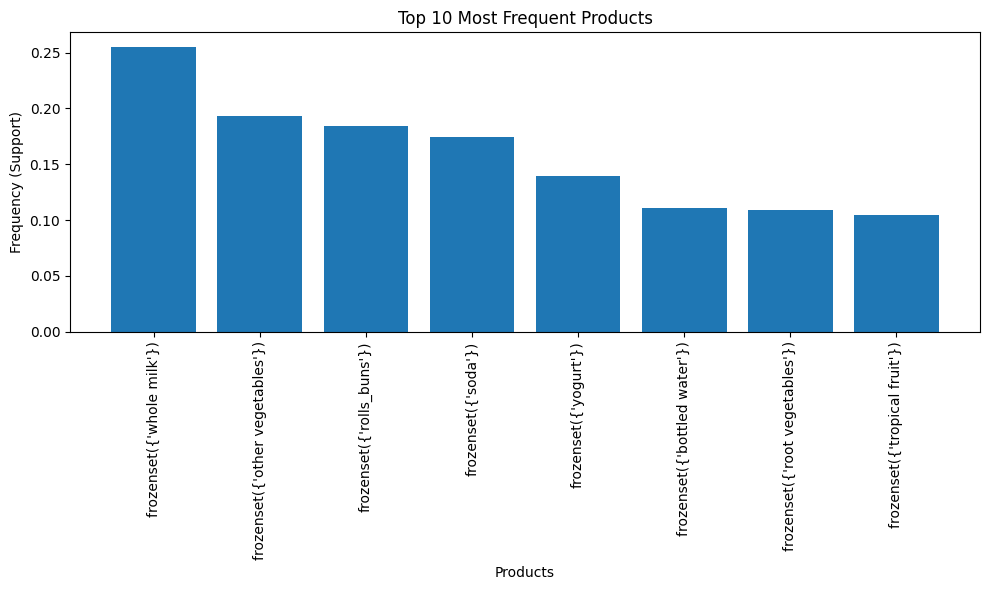

In [ ]:
# 3. Visualization of top 10 products
top_10_products = frequent_itemsets.head(10)
print(top_10_products)

plt.figure(figsize=(10, 6))
plt.bar(top_10_products['itemsets'].astype(str), top_10_products['support'])
plt.xlabel("Products")
plt.ylabel("Frequency (Support)")
plt.title("Top 10 Most Frequent Products")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Zad 6

In [ ]:
# 1. Remove spaces and convert to binary data
dataset = []
for index, row in dataset_raw.iterrows():
    transaction = []
    for item in row:
        if pd.notna(item):
            transaction.append(str(item).strip())
    dataset.append(transaction)

# Convert to binary representation using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped_sour cream  whisky  white bread  \
0  

# Zad 7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


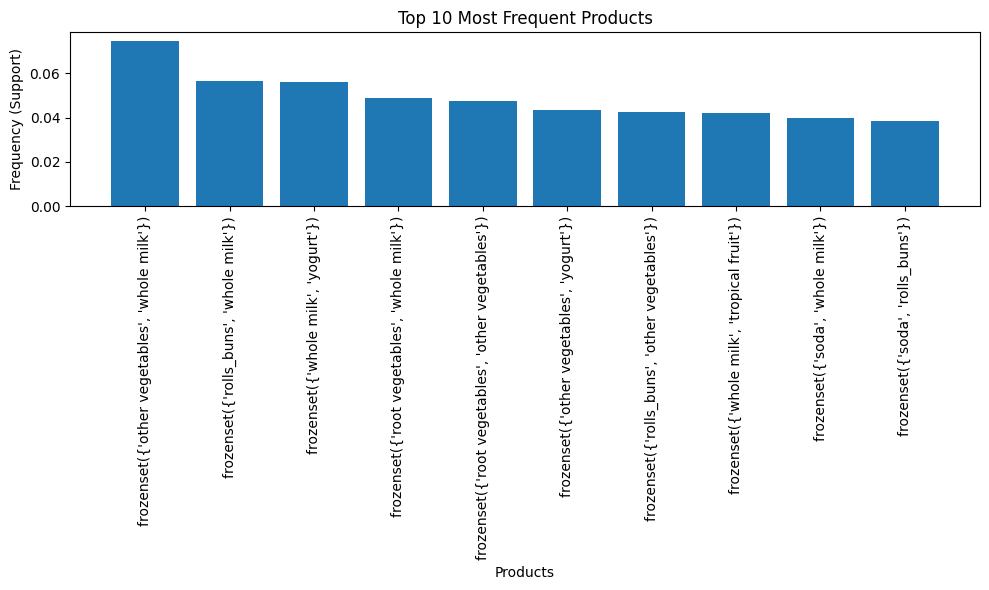


Top 10 Infrequent Products (excluding support 0):
      support                                 itemsets
199  0.010066                (whole milk, hard cheese)
190  0.010066        (fruit_vegestable juice, sausage)
236  0.010066              (waffles, other vegetables)
212  0.010066                (napkins, tropical fruit)
306  0.010066               (curd, whole milk, yogurt)
178  0.010066                   (frankfurter, sausage)
160  0.010066                       (curd, rolls_buns)
311  0.010168     (pork, other vegetables, whole milk)
117  0.010168           (brown bread, root vegetables)
318  0.010168  (other vegetables, whole milk, sausage)


In [ ]:
# 1. Generate frequent and infrequent products
min_support = 0.01  # You can adjust this value as needed

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=False)

# Filter out itemsets with only one element from top_10_frequent
top_10_frequent = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 1].head(10)

infrequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=True)

# Filter out itemsets with only one element from top_10_infrequent
top_10_infrequent = infrequent_itemsets[(infrequent_itemsets['support'] > 0) & (infrequent_itemsets['itemsets'].apply(len) > 1)].head(10)

# 2. Visualization of frequent products
plt.figure(figsize=(10, 6))
plt.bar(top_10_frequent['itemsets'].astype(str), top_10_frequent['support'])
plt.xlabel("Products")
plt.ylabel("Frequency (Support)")
plt.title("Top 10 Most Frequent Products")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nTop 10 Infrequent Products (excluding support 0):")
print(top_10_infrequent)

# Zad 8

In [ ]:
# 1. Generate frequent itemsets with length 2 and 3
min_support = 0.01  # ???

frequent_itemsets_all = apriori(df, min_support=min_support, use_colnames=True, max_len=3)

frequent_itemsets_2 = frequent_itemsets_all[frequent_itemsets_all['itemsets'].apply(len) == 2]

frequent_itemsets_3 = frequent_itemsets_all[frequent_itemsets_all['itemsets'].apply(len) == 3]

top_5_frequent_2 = frequent_itemsets_2.sort_values(by=['support'], ascending=False).head(5)
top_5_frequent_3 = frequent_itemsets_3.sort_values(by=['support'], ascending=False).head(5)

print("Top 5 Frequent Itemsets with Length 2:\n", top_5_frequent_2)
print("\nTop 5 Frequent Itemsets with Length 3:\n", top_5_frequent_3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 5 Frequent Itemsets with Length 2:
       support                             itemsets
239  0.074835       (other vegetables, whole milk)
267  0.056634             (rolls_buns, whole milk)
300  0.056024                 (whole milk, yogurt)
274  0.048907        (root vegetables, whole milk)
229  0.047382  (root vegetables, other vegetables)

Top 5 Frequent Itemsets with Length 3:
       support                                         itemsets
316  0.023183  (root vegetables, other vegetables, whole milk)
324  0.022267           (other vegetables, whole milk, yogurt)
313  0.017895       (rolls_buns, other vegetables, whole milk)
320  0.017082   (other vegetables, whole milk, tropical fruit)
327  0.015557                 (rolls_buns, whole milk, yogurt)


# Zad 9

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
num_itemsets = len(frequent_itemsets)

rules_confidence = association_rules(frequent_itemsets, metric="confidence",
                                     min_threshold=0.1, num_itemsets=num_itemsets)  # min_confidence = min_threshold ???

top_10_confidence = rules_confidence.sort_values(by=['confidence'], ascending=False).head(10)

print("Top 10 Rules based on Confidence:\n", top_10_confidence)

Top 10 Rules based on Confidence:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Zad 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


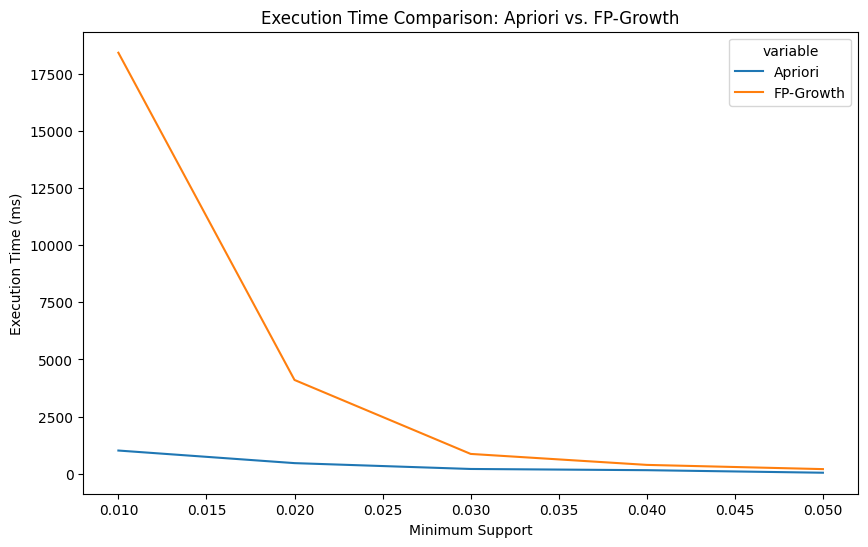

In [ ]:
import time
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth


min_supports = [0.01, 0.02, 0.03, 0.04, 0.05]

apriori_times = []
fpgrowth_times = []

# Measure execution time for Apriori
for min_support in min_supports:
    start_time = time.time()
    apriori(df, min_support=min_support, use_colnames=True)
    end_time = time.time()
    apriori_times.append((end_time - start_time) * 1000)  # Convert to milliseconds

# Measure execution time for FP-Growth
for min_support in min_supports:
    start_time = time.time()
    fpgrowth(df, min_support=min_support, use_colnames=True)
    end_time = time.time()
    fpgrowth_times.append((end_time - start_time) * 1000)  # Convert to milliseconds

data = {'min_support': min_supports, 'Apriori': apriori_times, 'FP-Growth': fpgrowth_times}
df_times = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.lineplot(x='min_support', y='value', hue='variable', data=pd.melt(df_times, ['min_support']))
plt.title('Execution Time Comparison: Apriori vs. FP-Growth')
plt.xlabel('Minimum Support')
plt.ylabel('Execution Time (ms)')
plt.show()